#**Titanic Dataset**

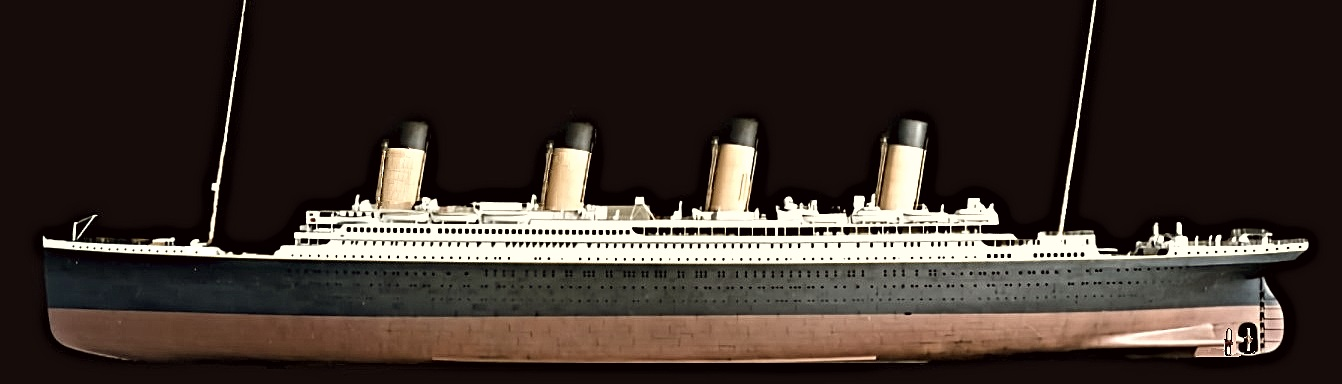

In [ ]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.shape

(418, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df['Cabin'].fillna('Unknown',inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#**Exploratory Data Analysis**

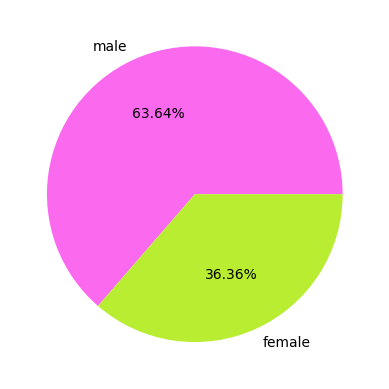

In [ ]:
sx=df['Sex'].value_counts().reset_index()
a=['male','female']
color=['#fa69ee','#b8ed32']
plt.pie(sx['Sex'],labels=a,autopct='%1.2f%%',colors=color)
plt.show()

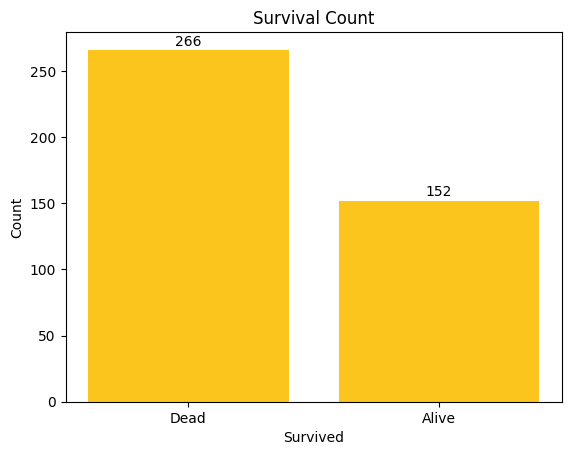

In [ ]:
sur_rate = df['Survived'].value_counts().reset_index()
sur_rate.rename(columns={'Survived': 'Count', 'index': 'Survived'}, inplace=True)
plt.bar(sur_rate['Survived'], sur_rate['Count'], color='#fcc51e')
for i, count in enumerate(sur_rate['Count']):
    plt.text(sur_rate['Survived'][i], count + 1, str(count), ha='center', va='bottom')
plt.xticks(sur_rate['Survived'], ['Dead', 'Alive'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

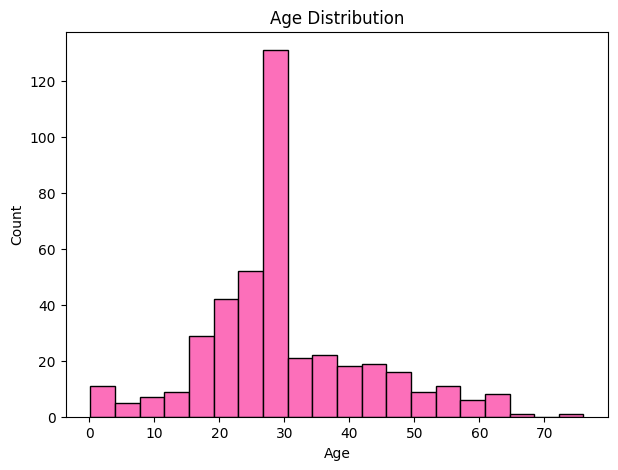

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(df['Age'],bins=20,edgecolor='black',color='#fc6fba')
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

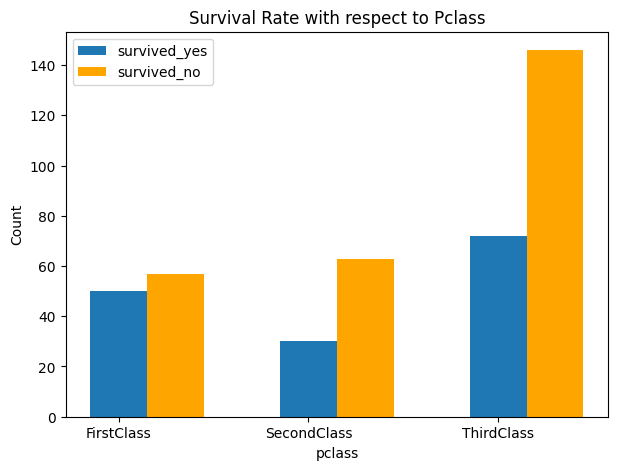

In [ ]:
a=df.groupby(['Survived','Pclass']).size().reset_index()
a.rename(columns={0:'Count'},inplace=True)
a_yes=a[a['Survived']==1]
a_no=a[a['Survived']==0]
plt.figure(figsize=(7,5))
b=list(df['Pclass'].unique())
c=np.arange(len(b))
plt.xticks(c,['FirstClass','SecondClass','ThirdClass'])
plt.bar(c,a_yes['Count'],label='survived_yes',width=0.3)
plt.bar(c+0.3,a_no['Count'],label='survived_no',width=0.3,color='orange')
plt.xlabel("pclass")
plt.ylabel("Count")
plt.title("Survival Rate with respect to Pclass")
plt.legend()
plt.show()

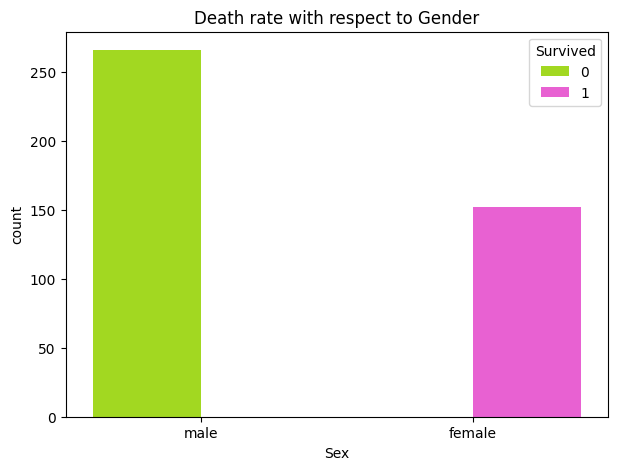

In [ ]:
plt.figure(figsize=(7, 5))
plt.xlabel("Sex")
color=['#aef702','#ff4ae1']
plt.title("Death rate with respect to Gender")
ax=sns.countplot(data=df,x='Sex', hue='Survived',palette=color,width=0.8)
plt.show()

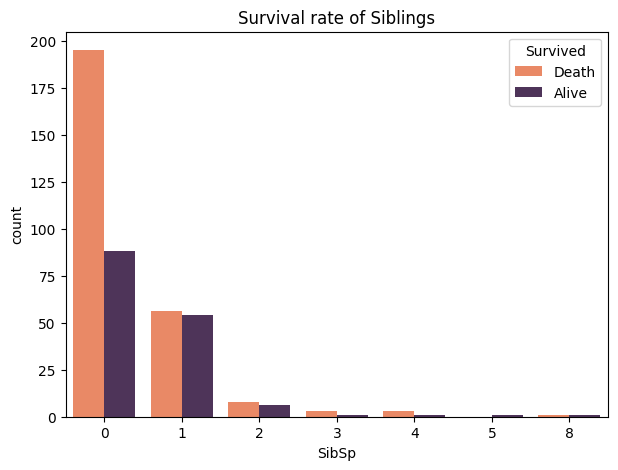

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Survival rate of Siblings")
color=['#FF7F50','#512E5F']
sns.countplot(data=df,x='SibSp',hue='Survived',palette=color)
plt.legend(title='Survived',labels=['Death','Alive'])
plt.show()

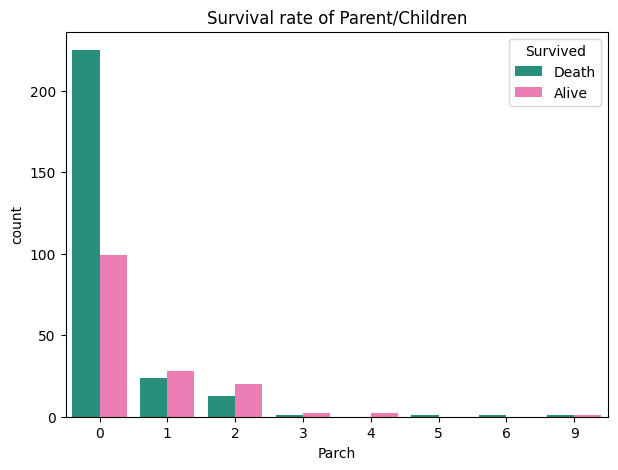

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Survival rate of Parent/Children")
color=['#16A085','#FF69B4']
sns.countplot(data=df,x='Parch',hue='Survived',palette=color)
plt.legend(title='Survived',labels=['Death','Alive'])
plt.show()

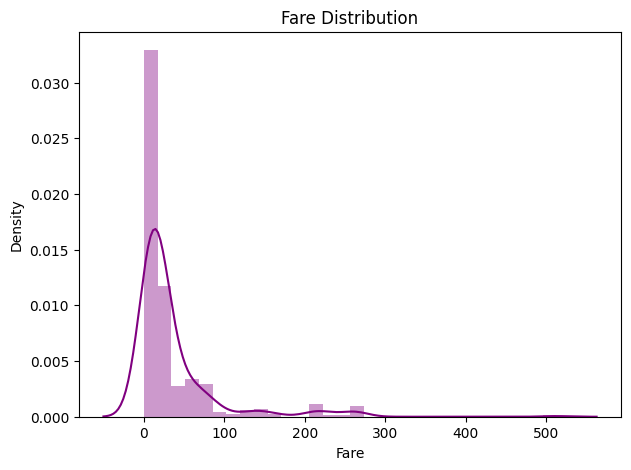

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Fare Distribution")
sns.distplot(df['Fare'],hist=True,bins=30,color='purple')
plt.show()

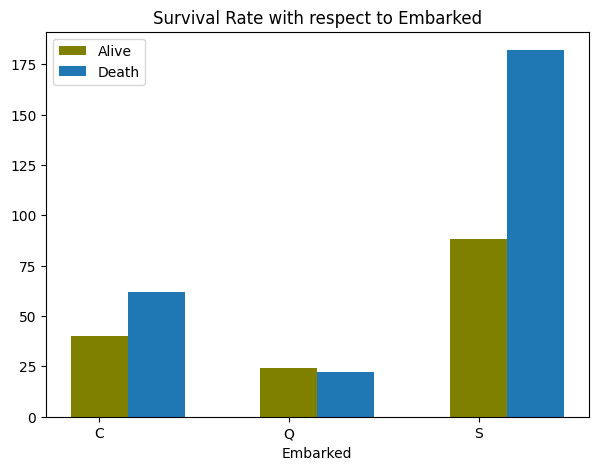

In [ ]:
embark=df.groupby(['Embarked','Survived']).size().reset_index()
embark.rename(columns={0:'Count'},inplace=True)
embark_yes=embark[embark['Survived']==1]
embark_no=embark[embark['Survived']==0]
plt.figure(figsize=(7,5))
b=list(df['Pclass'].unique())
c=np.arange(len(b))
plt.xticks(c,['C','Q','S'])
plt.xlabel("Embarked")
plt.title("Survival Rate with respect to Embarked")
plt.bar(c,embark_yes['Count'],label='Alive',color='olive',width=0.3)
plt.bar(c+0.3,embark_no['Count'],label='Death',width=0.3)
plt.legend()
plt.show()

<Axes: title={'center': 'Correlation'}>

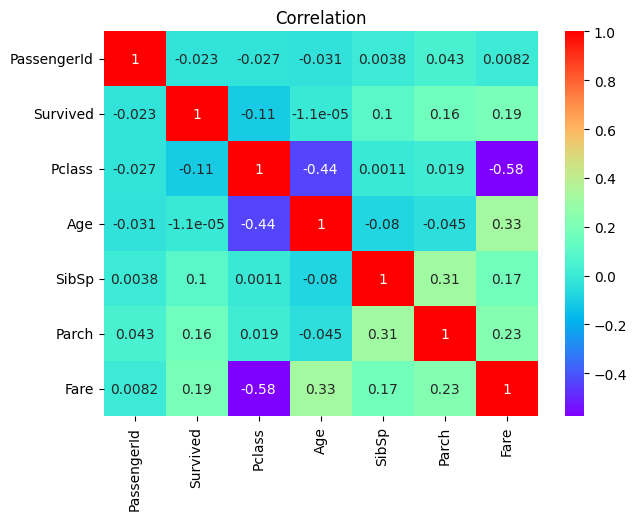

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='rainbow')